In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
ORIGINAL_FPS = 30
MANUAL_FPSS = ['2', '3', '5', '6', '10', '15']
USE_MANUAL_FPSS = True
THRESHOLD = 0.75

In [3]:
accuracy_result_dict_paths = [
	# '../assets/result/accuracy_movement/Video1_Accuracy_Result.json',
    # '../assets/result/accuracy_movement/Video2_Accuracy_Result.json',
    # '../assets/result/accuracy_movement/Video3_Accuracy_Result.json',
    '../assets/result/accuracy_movement/Video4_Accuracy_Result.json',
]

In [4]:
movement_result_dict_paths = [
	# '../assets/result/accuracy_movement/Video1_Movement_Result.json',
    # '../assets/result/accuracy_movement/Video2_Movement_Result.json',
    # '../assets/result/accuracy_movement/Video3_Movement_Result.json',
    '../assets/result/accuracy_movement/Video4_Movement_Result.json',
]

In [5]:
def round_floats_to_sigfigs(input_list, sigfigs):
	return [round(number, sigfigs) for number in input_list]

In [6]:
def load_json(filepath):
	with open(filepath, 'r') as file:
		data = json.load(file)
		
	return data

In [7]:
def extract_fpss(metric_list, data_type='metric'):
	return list(metric_list[list(metric_list.keys())[0]][0][data_type].keys())

In [8]:
def extract_metric_list(metric_list, fpss, feature='F1', data_type='metric'):
	result_column = {}
		
	for fps in fpss:
		if data_type == 'metric':
			result_column[fps] = [clip_metric[data_type][fps][feature] for clip_metric in metric_list]
		elif data_type == 'movement':
			result_column[fps] = [clip_metric[data_type][fps] for clip_metric in metric_list]
		
	return result_column

In [9]:
def cumulative_sum_list(input_list):
	result = []
	total = 0
	for item in input_list:
		total += item
		result.append(total)
	return result

def extract_metric_time(metric_list):
	frame_number_list = [clip_metric['frame_count'] for clip_metric in metric_list]
	time_list = cumulative_sum_list(frame_number_list)
	time_list = list(np.array(time_list) - time_list[0])
	scaled_time_list = list(np.array(time_list) / ORIGINAL_FPS)

	return round_floats_to_sigfigs(scaled_time_list, 0)

In [10]:
colors = [
	'#e6194B',
	'#f58231',
	'#9A6324',
	'#911eb4',
	'#3cb44b',
	'#f032e6',
	'#4363d8',
]

In [11]:
def plot_mutiple_lines(xs, yss, x_label, y_label, title, use_MANUAL_FPSS=False, line_y = 0.75, label_size=28, font_size=32, legend_size=16):
	fig, ax1 = plt.subplots(figsize=(48, 9))
		
	if use_MANUAL_FPSS:
		fpss = MANUAL_FPSS
	else:
		fpss = list(yss.keys())

	for i in range(len(fpss)):
		fps = fpss[i]
		ax1.plot(xs, yss[fps], color=colors[i], marker='o', label=fps + " FPS")
		
	# ax1.axhline(y=line_y, color='grey', linestyle='--', linewidth=line_width, label="Required Accuracy")

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	# ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

In [12]:
def plot_mutiple_lines_horizontal(xs, yss, x_label, y_label, title, use_MANUAL_FPSS=False, line_y = 0.75, label_size=28, font_size=32, legend_size=16, line_width=3):
	fig, ax1 = plt.subplots(figsize=(48, 9))
		
	if use_MANUAL_FPSS:
		fpss = MANUAL_FPSS
	else:
		fpss = list(yss.keys())

	for i in range(len(fpss)):
		fps = fpss[i]
		ax1.plot(xs, yss[fps], color=colors[i], marker='o', label=fps + " FPS")
		
	ax1.axhline(y=line_y, color='grey', linestyle='--', linewidth=line_width, label="Required Accuracy")

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	# ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

In [13]:
def find_max_index(string_list):
	# Convert each element to integer
	int_list = [int(element) for element in string_list]
		
	# Find index of maximum integer value
	max_index, max_value = max(enumerate(int_list), key=lambda x: x[1])
		
	return max_value

In [14]:
def extract_cheapest_fps(accuracy_dict, fpss, threshold=0.75, use_MANUAL_FPSS=False):
	if use_MANUAL_FPSS:
		fpss = MANUAL_FPSS
	else:
		fpss = fpss
				
	max_fps = find_max_index(fpss)
	
	cheapest_fpss = []
	for i in range(len(accuracy_dict[fpss[0]])):
		curr_fps = max_fps
		for fps in fpss:
			if accuracy_dict[fps][i] >= threshold and int(fps) < int(curr_fps):
				curr_fps = fps
		
		cheapest_fpss.append(int(curr_fps))
	
	return cheapest_fpss

In [15]:
def duplicate_elements_accuracy(input_list):
	result = []
	for item in input_list:
		result.append(item)
		result.append(item)
	return result

In [16]:
def duplicate_elements_time(input_list):
	result = [0]
	for item in input_list:
		if item == input_list[-1]:
			result.append(item)
			break
		result.append(item)
		result.append(item)
	return result

def cumulative_sum_list(input_list):
	result = []
	total = 0
	for item in input_list:
		total += item
		result.append(total)
	return result

def extract_metric_time_horizontal(metric_list):
	frame_number_list = [clip_metric['frame_count'] for clip_metric in metric_list]
	time_list = cumulative_sum_list(frame_number_list)
	time_list = duplicate_elements_time(time_list)
	scaled_time_list = list(np.array(time_list) / ORIGINAL_FPS)

	return round_floats_to_sigfigs(scaled_time_list, 0)

In [17]:
def plot_one_line(xs, ys, x_label, y_label, title, label_size=28, font_size=32, legend_size=20):
	fig, ax1 = plt.subplots(figsize=(9, 9))
	
	ax1.plot(xs, ys, color='black', label="Minimum Required FPS")

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	# ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

In [18]:
# combined_fps = []
# for result_dict_path in accuracy_result_dict_paths:
# 	result_dict = load_json(result_dict_path)
# 	fpss = extract_fpss(result_dict)

# 	for class_idx in list(result_dict.keys()):
# 		accuracy = extract_metric_list(result_dict[class_idx], fpss)
# 		cheapest_fps = extract_cheapest_fps(accuracy, fpss, THRESHOLD, USE_MANUAL_FPSS)
# 		duplicated_cheapest_fps = duplicate_elements_accuracy(cheapest_fps)
# 		duplicated_time = extract_metric_time_horizontal(result_dict[class_idx])

# 		combined_fps.extend(cheapest_fps)

In [19]:
# with open("../assets/result/accuracy/Combined-FPS" + ".json", 'w') as file:
#     json.dump(combined_fps, file, indent=4)

In [20]:
# for result_dict_path in result_dict_paths:
#     result_dict = load_json(result_dict_path)
#     fpss = extract_fpss(result_dict)

#     for class_idx in list(result_dict.keys()):
#         accuracy = extract_metric_list(result_dict[class_idx], fpss)
#         time = extract_metric_time(result_dict[class_idx])
#         plot_mutiple_lines(time, accuracy, 'Time (S)', 'F1', 'F1 at Different FPS', USE_MANUAL_FPSS)

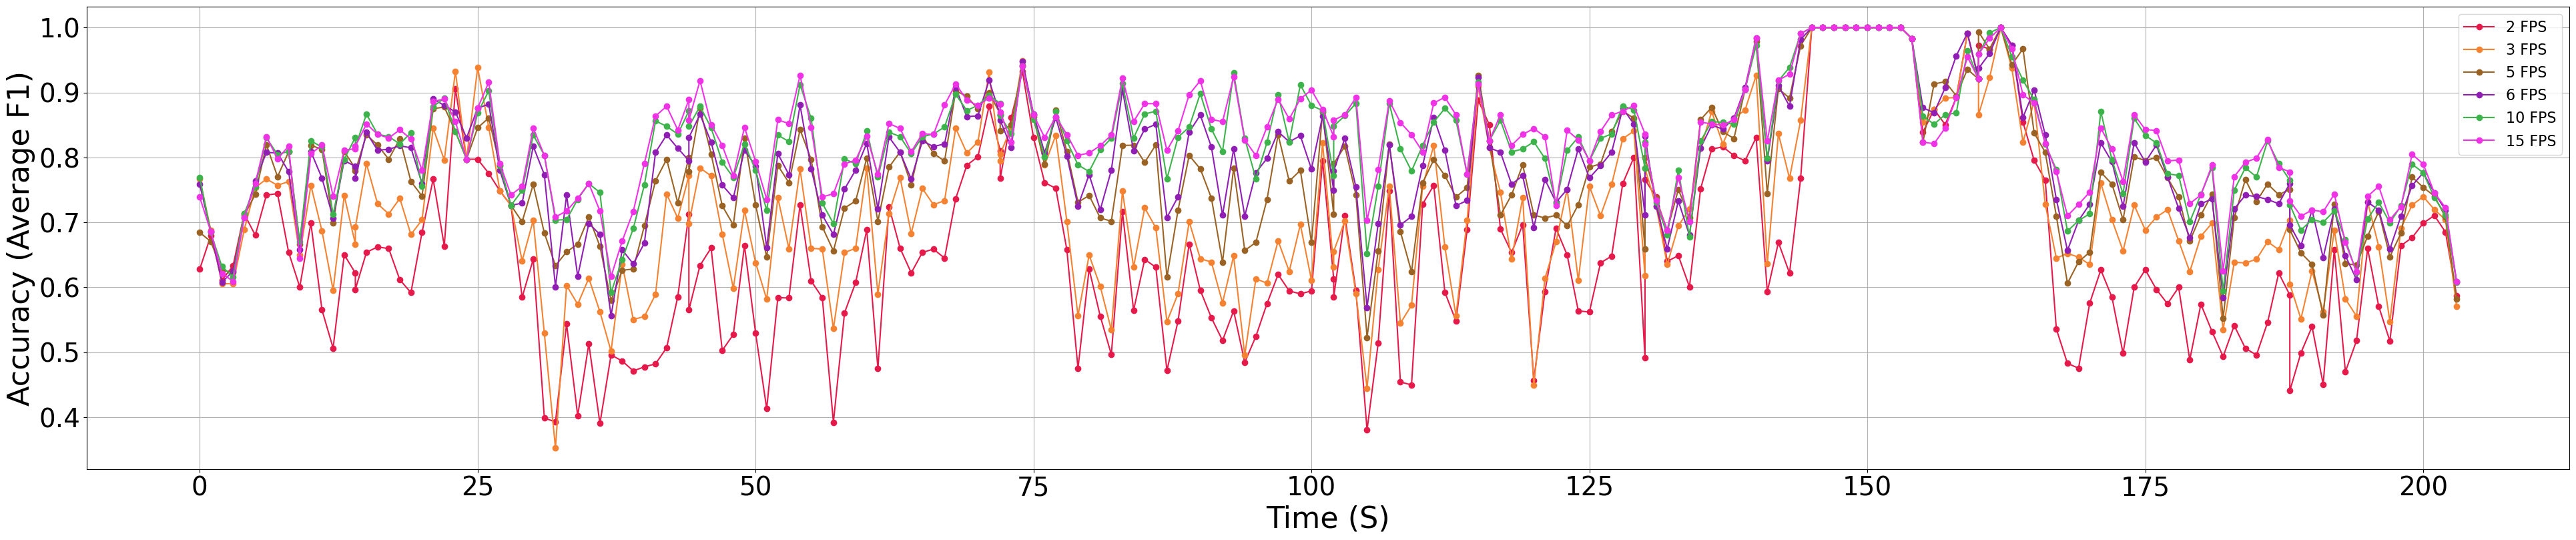

In [21]:
for result_dict_path in accuracy_result_dict_paths:
	result_dict = load_json(result_dict_path)
	fpss = extract_fpss(result_dict)

	for class_idx in list(result_dict.keys()):
		accuracy = extract_metric_list(result_dict[class_idx], fpss)
		time = extract_metric_time(result_dict[class_idx])
		plot_mutiple_lines(time, accuracy, 'Time (S)', 'Accuracy (Average F1)', 'F1 at Different FPS', USE_MANUAL_FPSS, THRESHOLD)

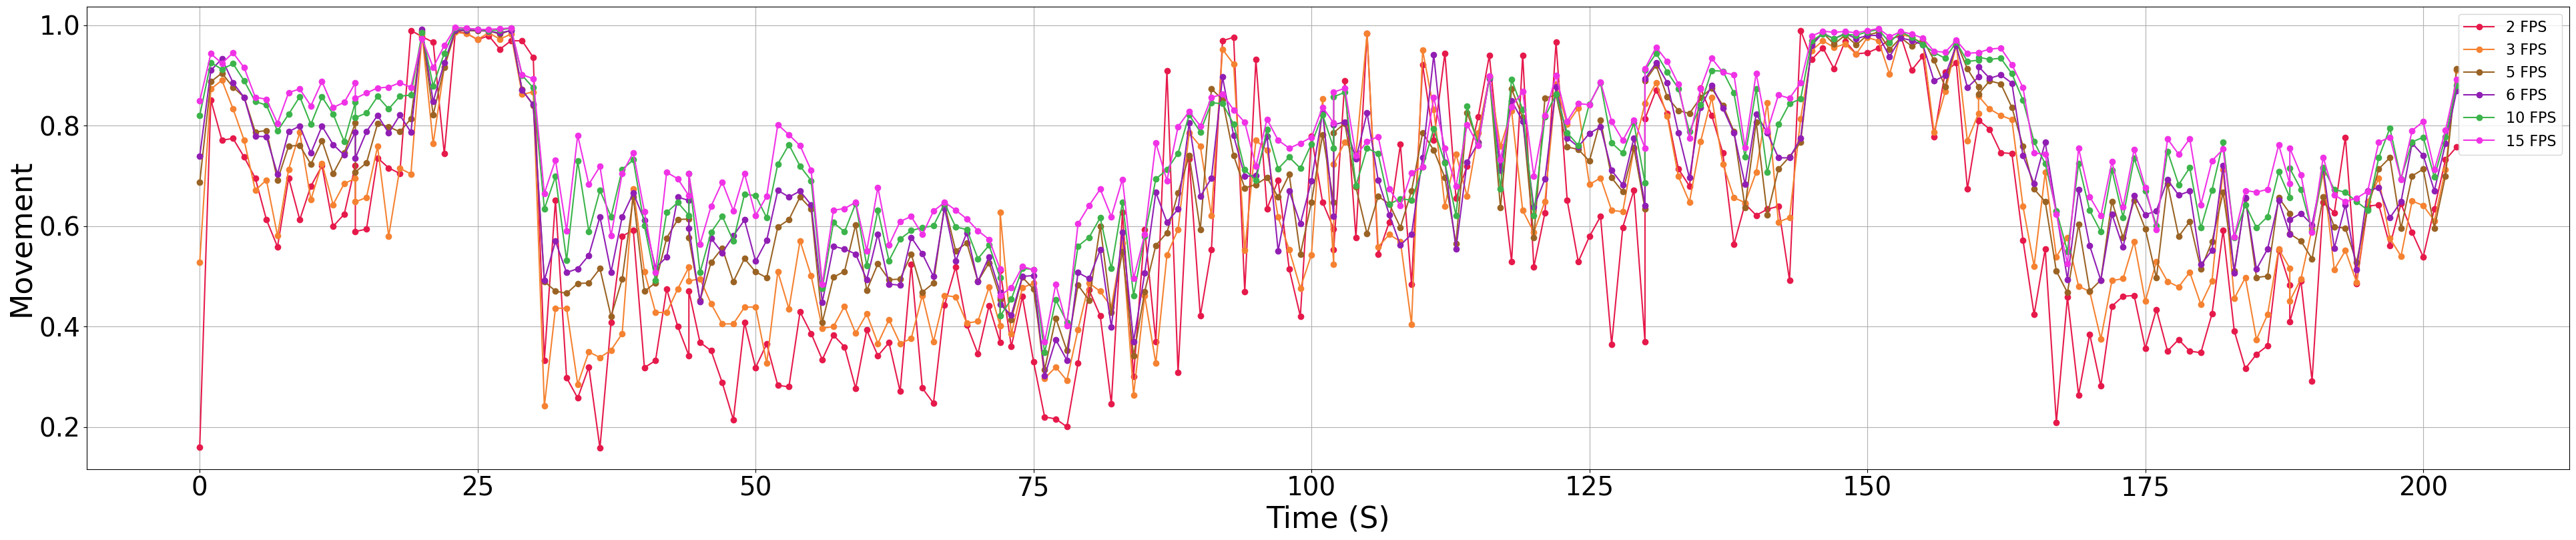

In [22]:
for result_dict_path in movement_result_dict_paths:
	result_dict = load_json(result_dict_path)
	fpss = extract_fpss(result_dict, data_type='movement')

	for class_idx in list(result_dict.keys()):
		movement = extract_metric_list(result_dict[class_idx], fpss, data_type='movement')
		time = extract_metric_time(result_dict[class_idx])
		plot_mutiple_lines(time, movement, 'Time (S)', 'Movement', 'Movement at Different FPS', USE_MANUAL_FPSS, THRESHOLD)

In [23]:
# for result_dict_path in accuracy_result_dict_paths:
# 	result_dict = load_json(result_dict_path)
# 	fpss = extract_fpss(result_dict)

# 	for class_idx in list(result_dict.keys()):
# 		accuracy = extract_metric_list(result_dict[class_idx], fpss)
# 		cheapest_fps = extract_cheapest_fps(accuracy, fpss, THRESHOLD, USE_MANUAL_FPSS)
# 		duplicated_cheapest_fps = duplicate_elements_accuracy(cheapest_fps)
# 		duplicated_time = extract_metric_time_horizontal(result_dict[class_idx])

# 		plot_one_line(duplicated_time, duplicated_cheapest_fps, 'Time (s)', 'FPS', 'Cheapest FPS Satisfying Required Accuracy')

In [24]:
for i in range(len(accuracy_result_dict_paths)):
	print(f'{os.path.splitext(os.path.basename(accuracy_result_dict_paths[i]))[0]}')
	accuracy_result_dict_path = accuracy_result_dict_paths[i]
	accuracy_result_dict = load_json(accuracy_result_dict_path)
	
	fpss = extract_fpss(accuracy_result_dict)

	movement_result_dict_path = movement_result_dict_paths[i]
	movement_result_dict = load_json(movement_result_dict_path)	

	for class_idx in list(accuracy_result_dict.keys()):
		accuracy_result = extract_metric_list(accuracy_result_dict[class_idx], fpss)
		movement_result = extract_metric_list(movement_result_dict[class_idx], fpss, data_type='movement')
		
		for fps in MANUAL_FPSS:
			print(f'FPS: {fps}')
			correlation_matrix = np.corrcoef(accuracy_result[fps], movement_result[fps])
			correlation_coefficient = correlation_matrix[0, 1]
			print(correlation_coefficient)

Video4_Accuracy_Result
FPS: 2
0.4760289157723418
FPS: 3
0.41676246794044103
FPS: 5
0.3824018158933275
FPS: 6
0.3309183542850921
FPS: 10
0.23907055676165995
FPS: 15
0.22276742038749983


In [25]:
def plot_two_ys(xs, y1s, y2s, x_label, y1_label, y2_label, title, label_size=28, font_size=32):
	fig, ax1 = plt.subplots(figsize=(48, 9))

	ax1.plot(xs, y1s, color=colors[0], marker='o', label=y1_label)  # 'o' denotes the marker type
	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y1_label, color=colors[0], fontsize=font_size)
	ax1.tick_params(axis='both', labelsize=label_size)

	ax2 = ax1.twinx()
	ax2.plot(xs, y2s, color=colors[3], marker='o', label=y2_label)  # 'o' denotes the marker type
	ax2.set_ylabel(y2_label, color=colors[3], fontsize=font_size)
	ax2.tick_params(axis='y', labelsize=label_size)

	plt.title(title, fontsize=font_size)
	plt.grid(True)

	plt.show()

Video4_Accuracy_Result


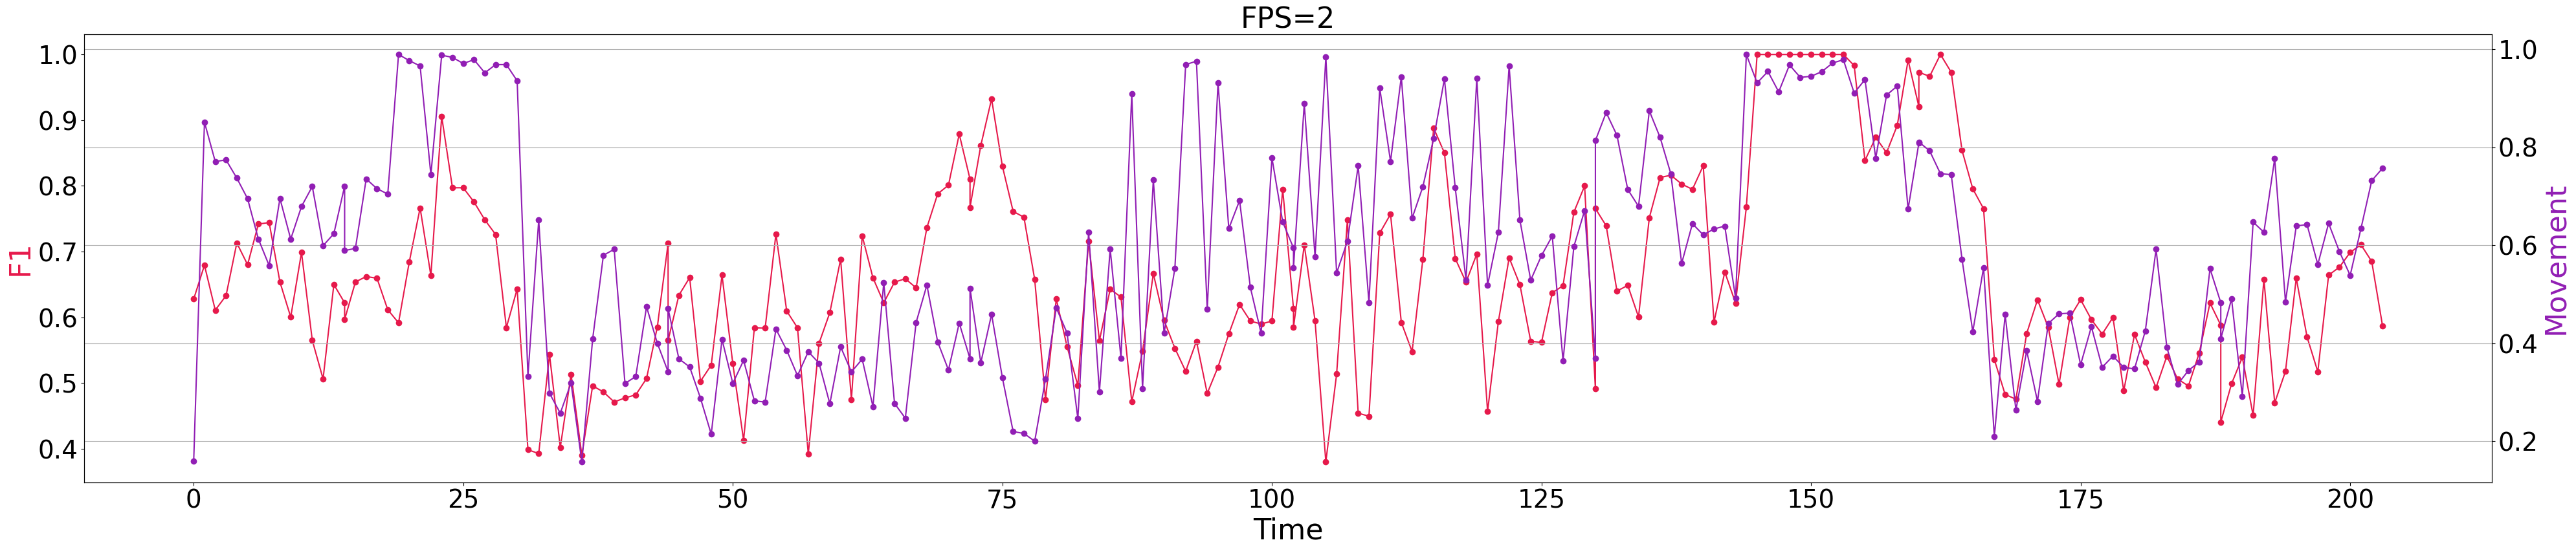

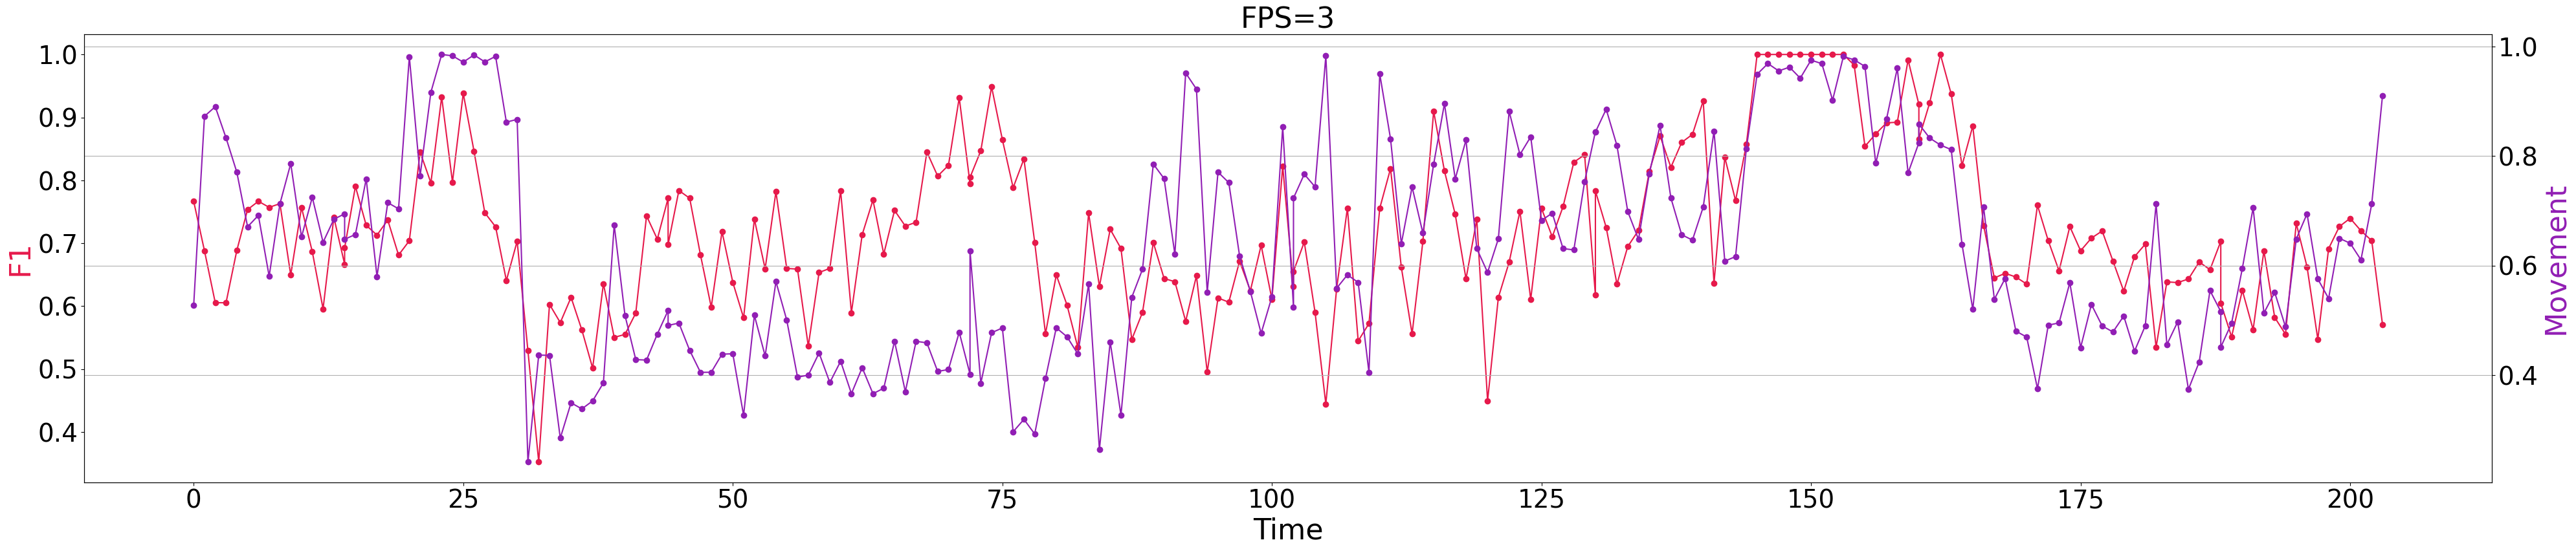

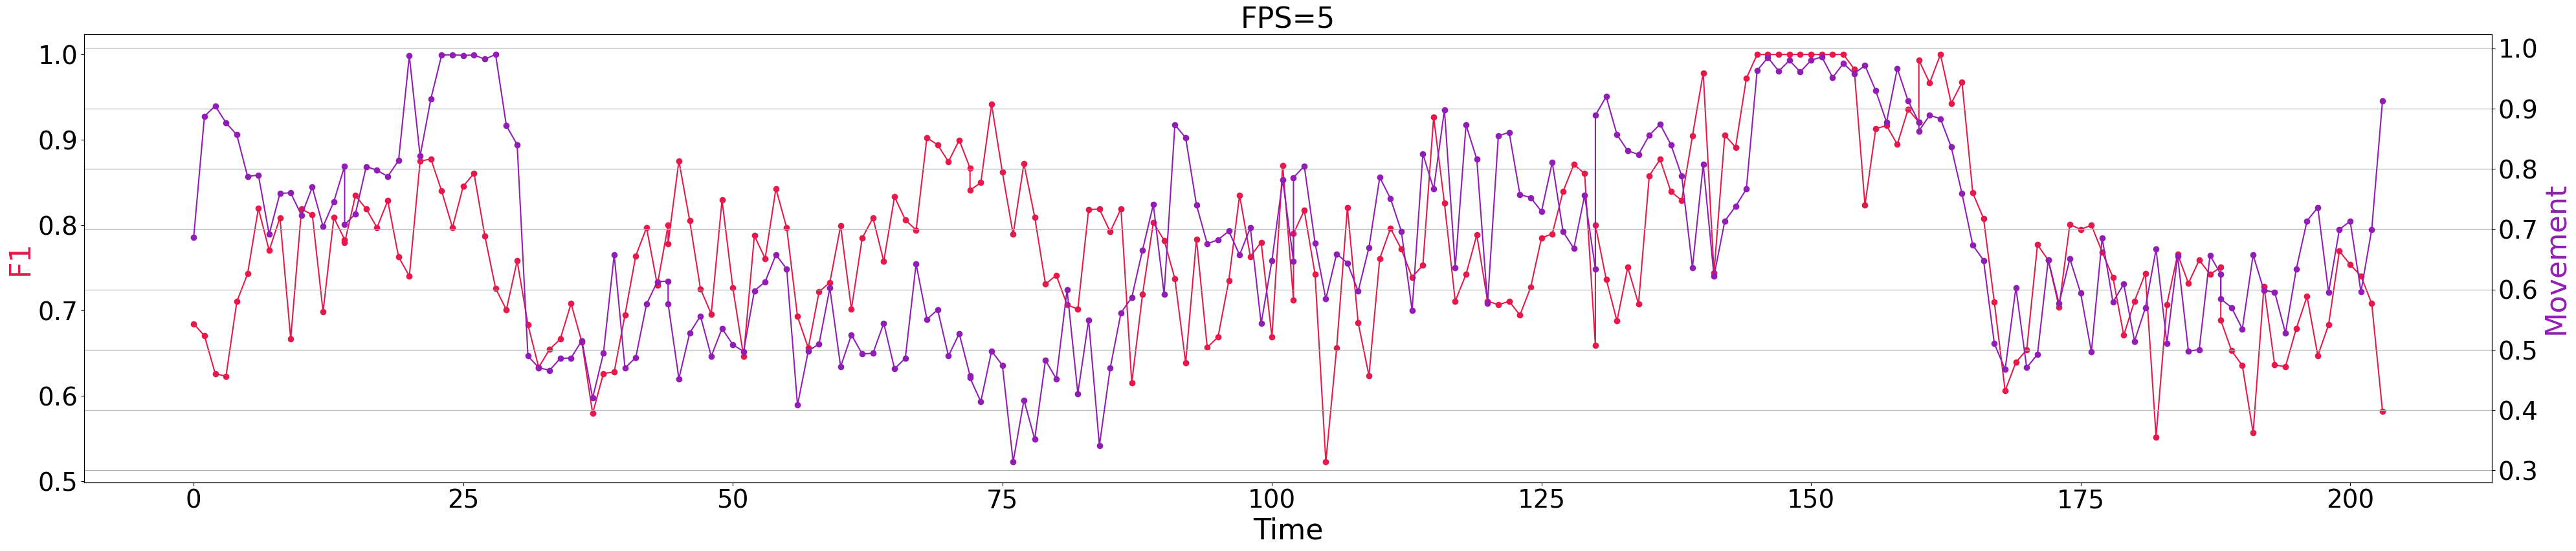

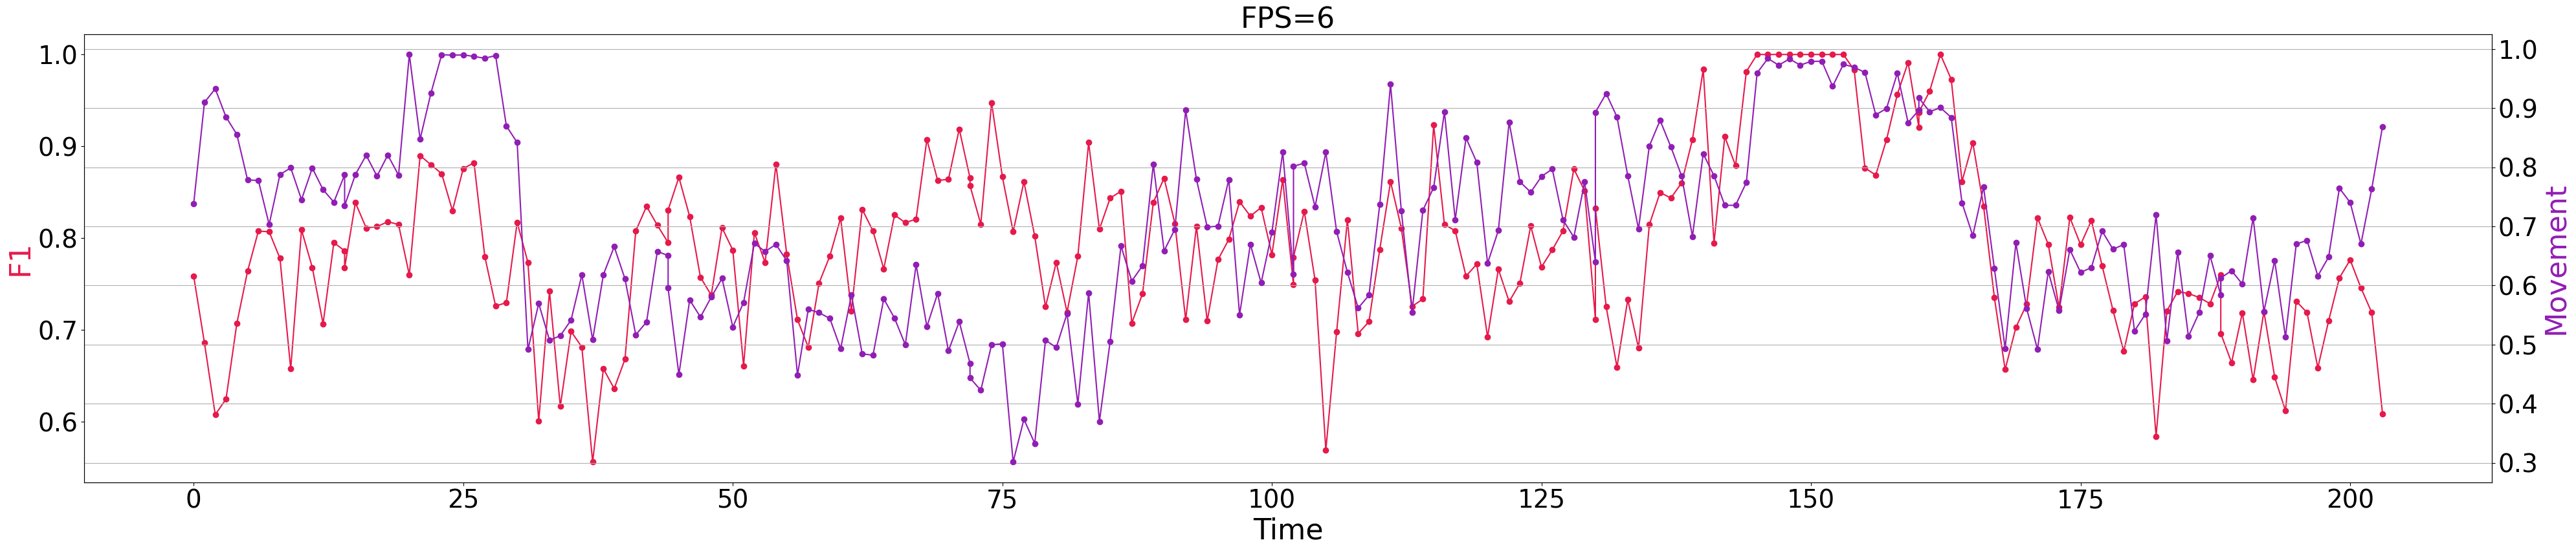

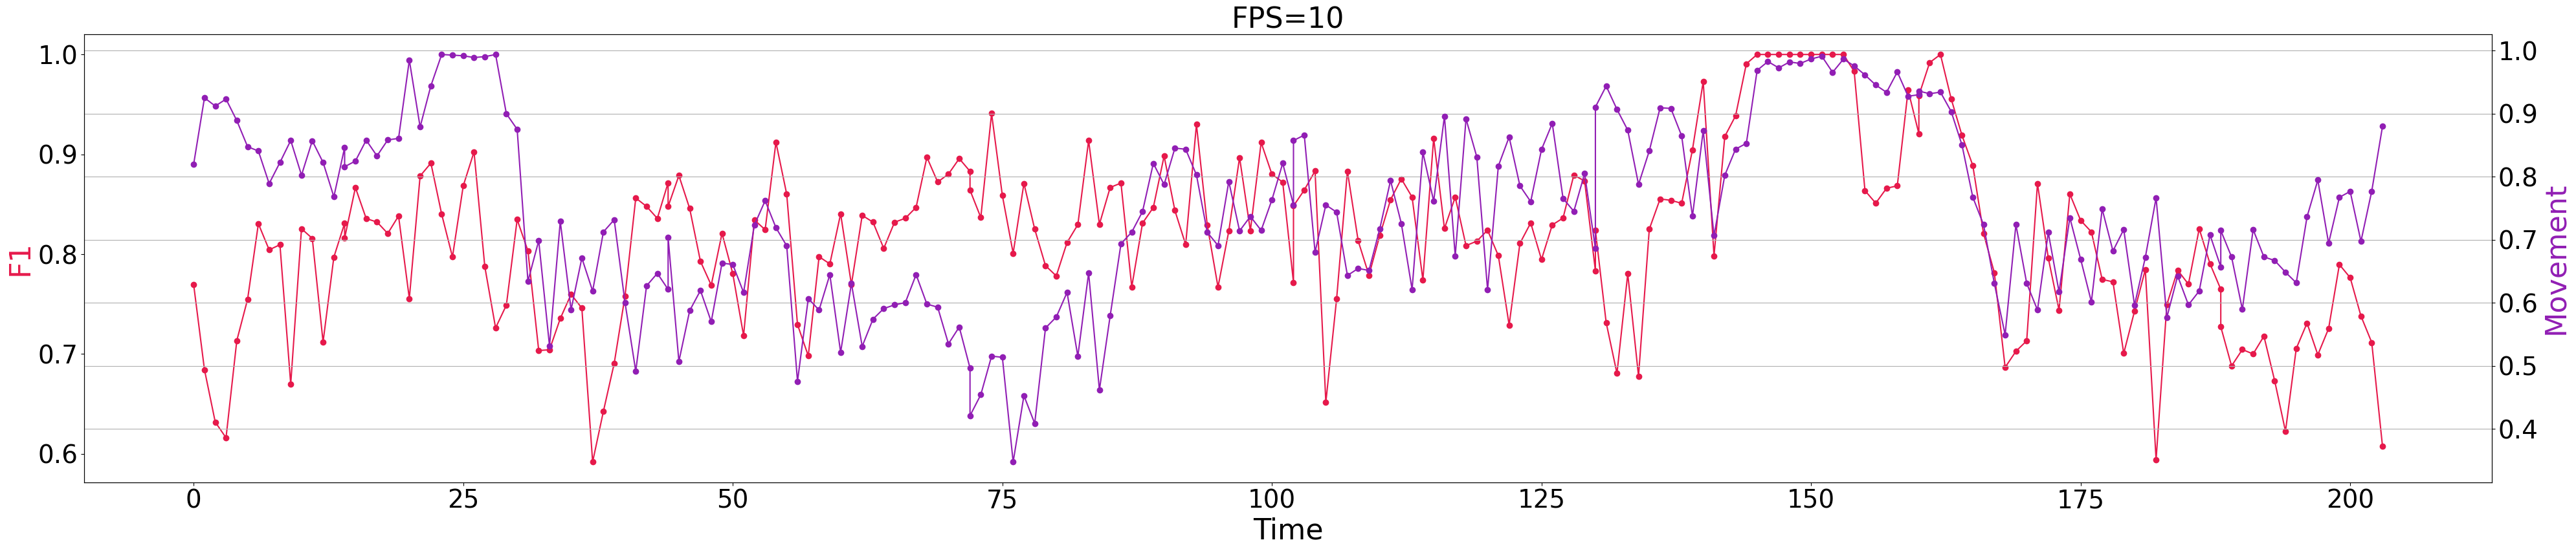

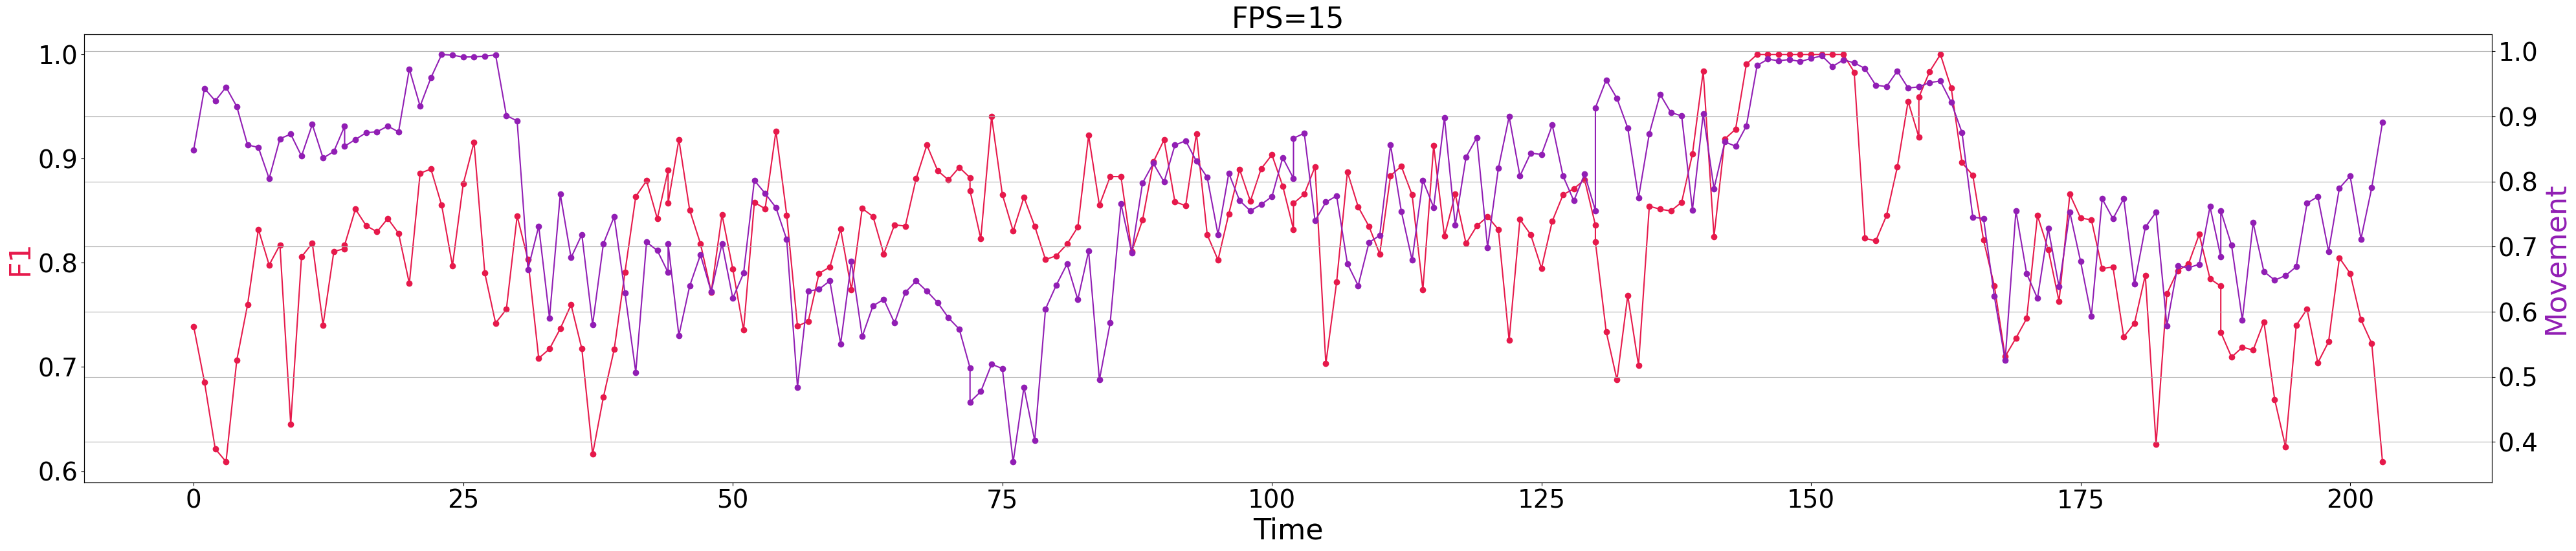

In [26]:
for i in range(len(accuracy_result_dict_paths)):
	print(f'{os.path.splitext(os.path.basename(accuracy_result_dict_paths[i]))[0]}')
	accuracy_result_dict_path = accuracy_result_dict_paths[i]
	accuracy_result_dict = load_json(accuracy_result_dict_path)
	
	fpss = extract_fpss(accuracy_result_dict)

	movement_result_dict_path = movement_result_dict_paths[i]
	movement_result_dict = load_json(movement_result_dict_path)

	for class_idx in list(accuracy_result_dict.keys()):
		accuracy_result = extract_metric_list(accuracy_result_dict[class_idx], fpss)
		movement_result = extract_metric_list(movement_result_dict[class_idx], fpss, data_type='movement')
		time = extract_metric_time(accuracy_result_dict[class_idx])
		
		for fps in MANUAL_FPSS:
			plot_two_ys(time, accuracy_result[fps], movement_result[fps], 'Time', 'F1', 'Movement', f'FPS={fps}')

In [27]:
def plot_scatter(x_points, y_points, x_label, y_label, title, x_range=(0, 1), y_range=(0, 1), label_size=28, font_size=32, legend_size=24):
    x_points = np.array(x_points)
    y_points = np.array(y_points)
    
    plt.figure(figsize=(8, 8))
    plt.scatter(x_points, y_points, color=colors[0])
    plt.title(title, fontsize=font_size)
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.xticks(fontsize=label_size)
    plt.yticks(fontsize=label_size)
    # plt.legend(fontsize=legend_size)
    plt.grid(True)
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    
    plt.show()


Video4_Accuracy_Result


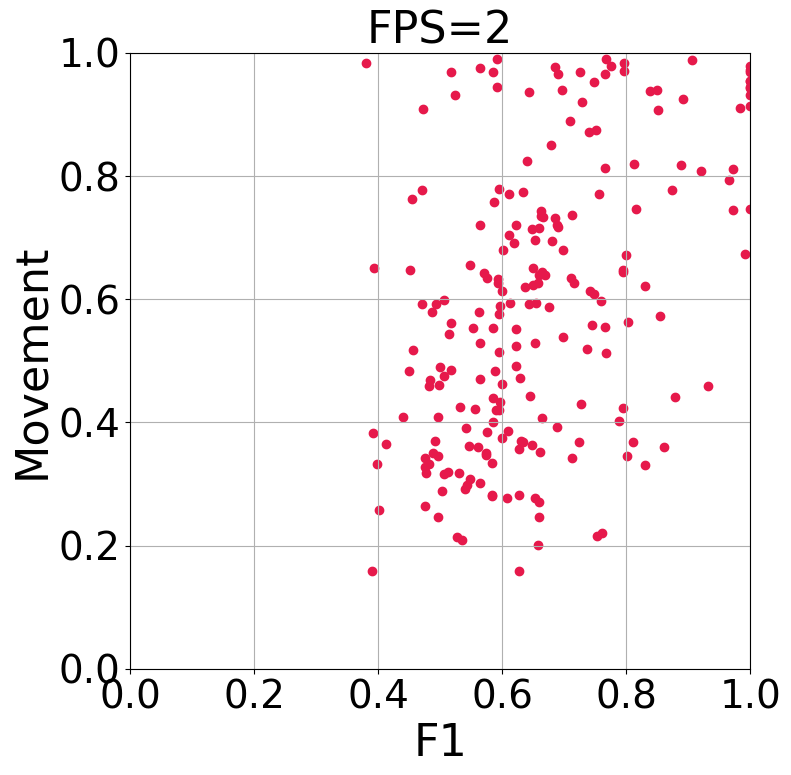

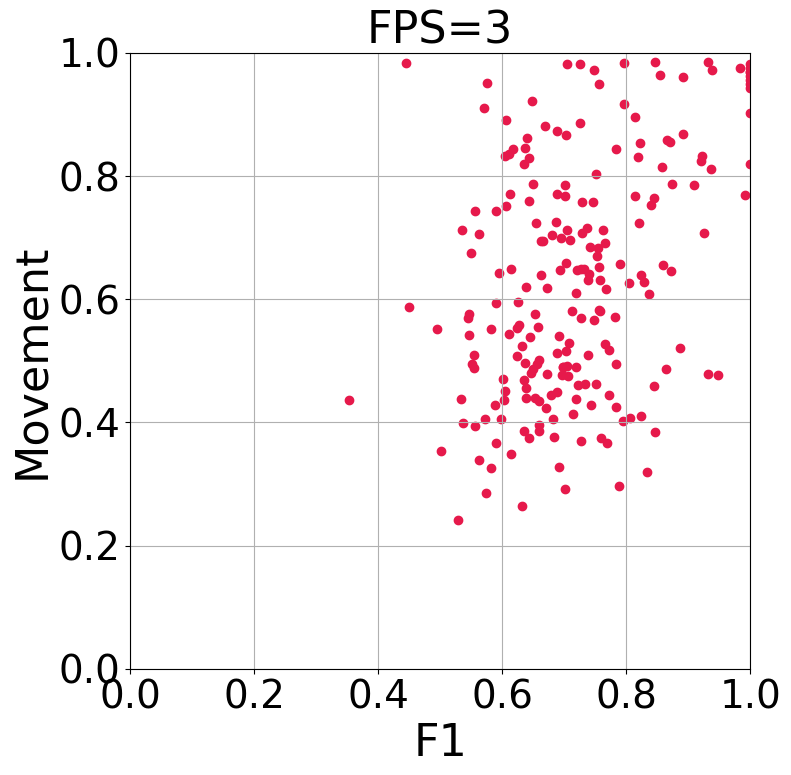

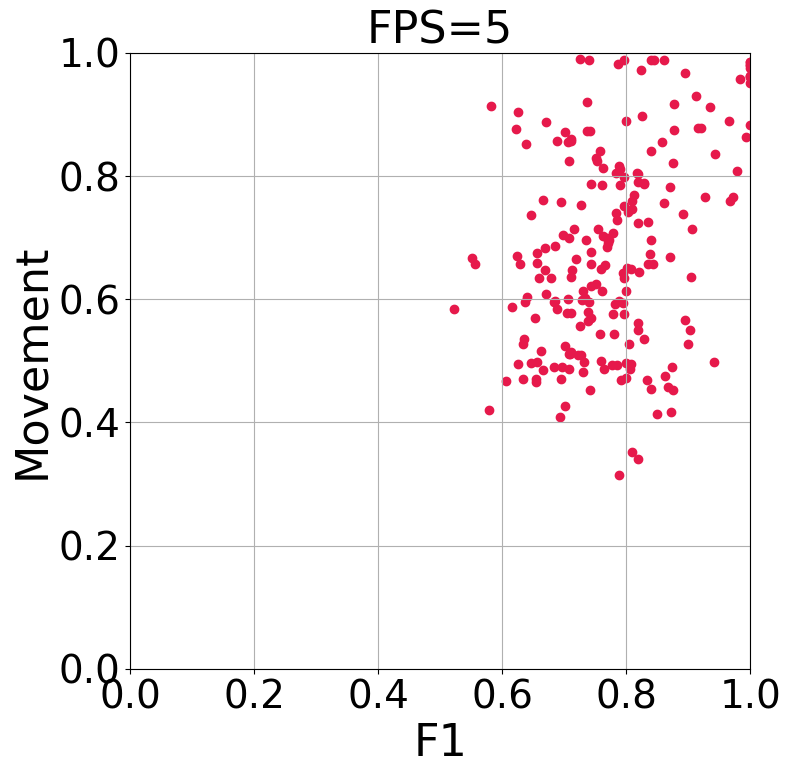

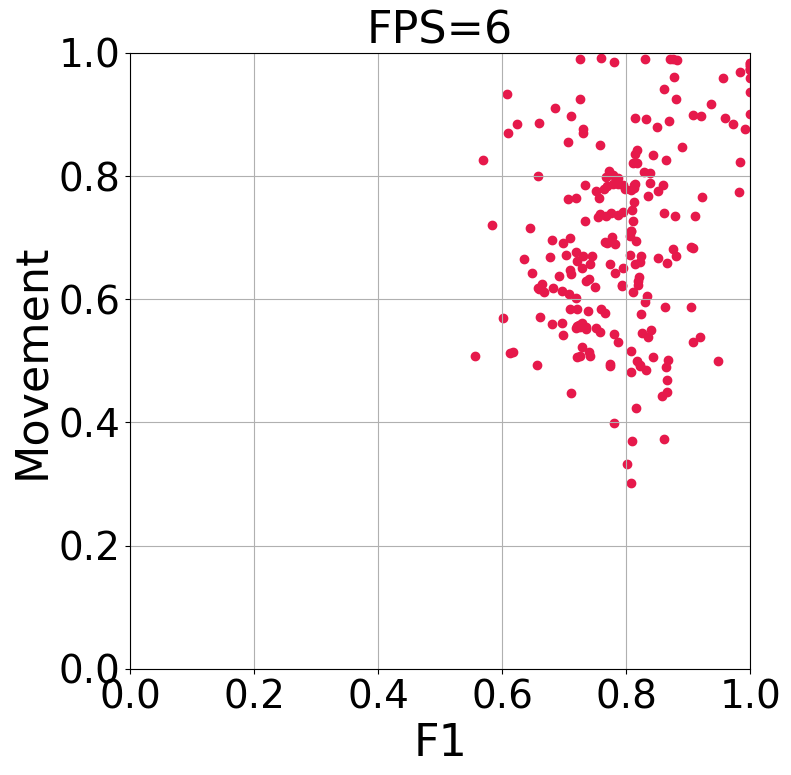

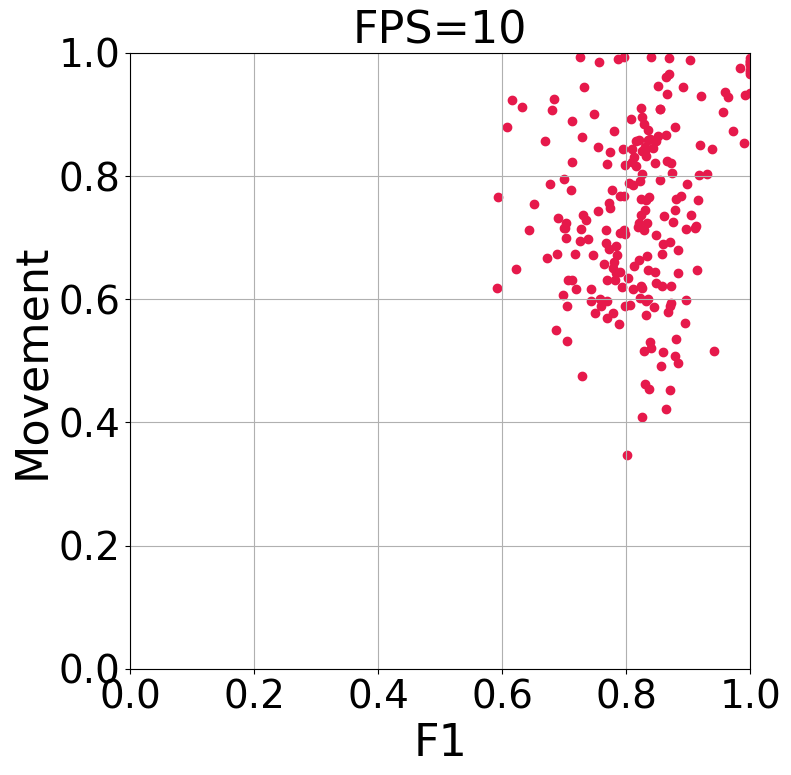

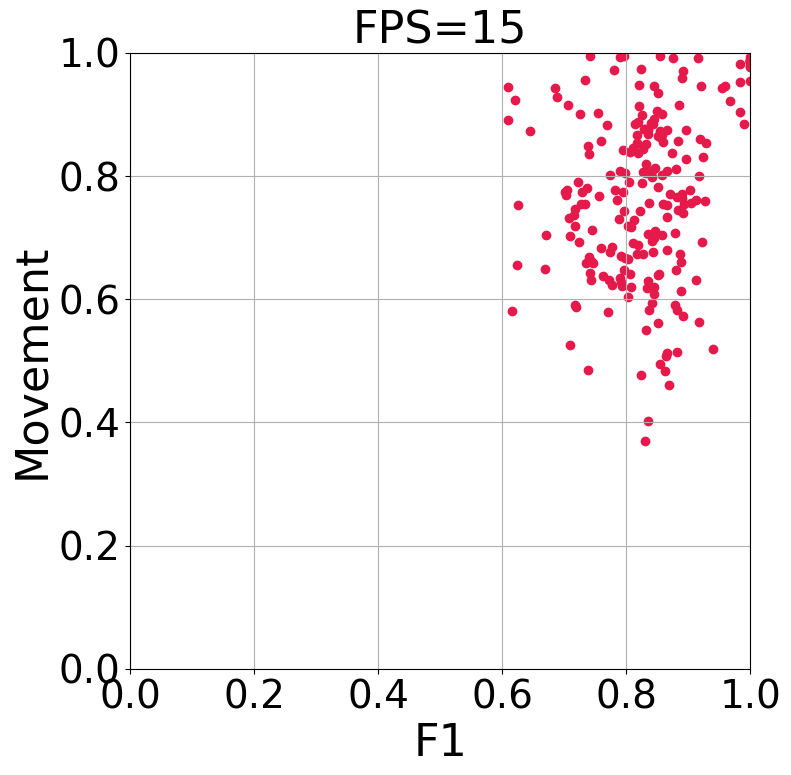

In [28]:
for i in range(len(accuracy_result_dict_paths)):
	print(f'{os.path.splitext(os.path.basename(accuracy_result_dict_paths[i]))[0]}')
	accuracy_result_dict_path = accuracy_result_dict_paths[i]
	accuracy_result_dict = load_json(accuracy_result_dict_path)
	
	fpss = extract_fpss(accuracy_result_dict)

	movement_result_dict_path = movement_result_dict_paths[i]
	movement_result_dict = load_json(movement_result_dict_path)

	for class_idx in list(accuracy_result_dict.keys()):
		accuracy_result = extract_metric_list(accuracy_result_dict[class_idx], fpss)
		movement_result = extract_metric_list(movement_result_dict[class_idx], fpss, data_type='movement')
		time = extract_metric_time(accuracy_result_dict[class_idx])
		
		for fps in MANUAL_FPSS:
			plot_scatter(accuracy_result[fps], movement_result[fps], 'F1', 'Movement', f'FPS={fps}', label_size=28, font_size=32, legend_size=24)